In [ ]:
# HIDDEN
import warnings
# Ignore numpy dtype warnings. These warnings are caused by an interaction
# between numpy and Cython and can be safely ignored.
# Reference: https://stackoverflow.com/a/40846742
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
import nbinteract as nbi

sns.set()
sns.set_context('talk')
np.set_printoptions(threshold=20, precision=2, suppress=True)
pd.options.display.max_rows = 7
pd.options.display.max_columns = 8
pd.set_option('precision', 2)
# This option stops scientific notation for pandas
# pd.set_option('display.float_format', '{:.2f}'.format)

# Least Squares &mdash; A Geometric Perspective

Recall that we found the optimal coefficients for linear models by optimizing their loss functions with gradient descent. We also mentioned that least squares linear regression can be solved analytically. While gradient descent is practical, this geometric perspective will provide a deeper understanding of linear regression.

A Vector Space Review is included in the Appendix. We will assume familiarity with vector arithmetic, the 1-vector, span of a collection of vectors, and projections.

Suppose we seek a linear model for this data:

| x | y |
| - | - |
| 3 | 2 |
| 0 | 1 |
| -1 | -2 |

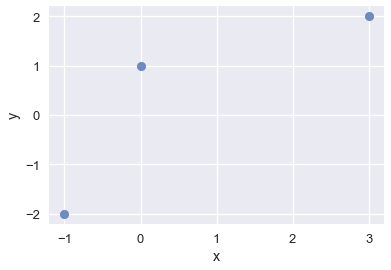

In [2]:
# HIDDEN
data = pd.DataFrame(
    [
        [3,2],
        [0,1],
        [-1,-2]
    ],
    columns=['x', 'y']
)

sns.regplot(x='x', y='y', data=data, ci=None, fit_reg=False);

Assume that the best model is one with the least error, and that the least squares error is an acceptable measure.

## Least Squares: Constant Model

Like we did with the tips dataset, let's start with the constant model: the model that only ever predicts a single number.

$$ \theta = C$$

Thus, we are working with just the $y$-values.

| y |
| - |
| 2 |
| 1 |
| -2 |

Our goal is to find the $ \theta $ that results in the line that minimizes the squared loss:

$$ L(\theta, \textbf{y}) = \sum_{i = 1}^{n}(y_i - \theta)^2\\ $$

Recall that for the constant model, the minimizing $\theta$ for MSE is $\bar{\textbf{y}}$, the average of the $\textbf{y}$ values. The calculus derivation can be found in the Loss Functions lesson in the Modeling and Estimations chapter. For the linear algebra derivation, please refer to the Vector Space Review in the Appendix.

Notice that our loss function is a sum of squares. The *L2*-norm for a vector is also a sum of squares, but with a square root: 

$$\Vert \textbf{v} \Vert = \sqrt{v_1^2 + v_2^2 + \dots + v_n^2}$$ 

If we let $y_i - \theta = v_i$:

$$
\begin{aligned}
L(\theta, \textbf{y}) 
&= v_1^2 + v_2^2 + \dots + v_n^2 \\
&= \Vert \textbf{v} \Vert^2
\end{aligned}
$$

This means our loss can be expressed as the *L2*-norm of some vector $\textbf{v}$, squared. We can express $v_i$ as $y_i - \theta \quad \forall i \in [1,n]$ so that in Cartesian notation, 

$$
\begin{aligned}
\textbf{v} \quad &= \quad \begin{bmatrix} y_1 - \theta \\ y_2 - \theta \\ \vdots \\ y_n - \theta \end{bmatrix} \\
&= \quad \begin{bmatrix} y_1 \\ y_2 \\ \vdots \\ y_n  \end{bmatrix} \quad - \quad 
\begin{bmatrix} \theta \\ \theta \\ \vdots \\ \theta \end{bmatrix} \\
&= \quad \begin{bmatrix} y_1 \\ y_2 \\ \vdots \\ y_n  \end{bmatrix} \quad - \quad 
\theta \begin{bmatrix} 1 \\ 1 \\ \vdots \\ 1 \end{bmatrix}
\end{aligned}
$$

So our loss function can be written as:

$$ 
\begin{aligned}
L(\theta, \textbf{y})
\quad &= \quad \left \Vert  \qquad   
\begin{bmatrix} y_1 \\ y_2 \\ \vdots \\ y_n  \end{bmatrix} \quad - \quad 
\theta \begin{bmatrix} 1 \\ 1 \\ \vdots \\ 1 \end{bmatrix}
\qquad \right \Vert ^2 \\
\quad &= \quad \left \Vert  \qquad  
\textbf{y} 
\quad - \quad 
\hat{\textbf{y}}
\qquad \right \Vert ^2 \\
\end{aligned}
$$

The expression $\theta \begin{bmatrix} 1 \\ 1 \\ \vdots \\ 1 \end{bmatrix}$  is a scalar multiple of the columns of the $\textbf{1}$ vector, and is the result of our predictions, denoted $\hat{\textbf{y}}$.

This gives us a new perspective on what it means to minimize the least squares error.

$\textbf{y}$ and $\textbf{1}$ are fixed, but $\theta$ can take on any value, so $\hat{\textbf{y}}$ can be any scalar multiple of $\textbf{1}$. We want to find $\theta$ so that $ \theta \textbf{1} $ is as close to $\textbf{y}$ as possible. We use $\hat{\theta}$ to denote this best-fit $\theta$.

```{image} linear_projection_img/1dprojection.png
:alt: 1dprojection.png
:width: 300px
:align: center
```

The projection of $\textbf{y}$ onto $\textbf{1}$ is guaranteed to be the closest vector (see "Vector Space Review" in the Appendix).

## Least Squares: Simple Linear Model
Now, let's look at the simple linear regression model. This is strongly parallel to the constant model derivation, but be mindful of the differences and think about how you might generalize to multiple linear regression.

The simple linear model is:

$$
\begin{aligned}
f_\boldsymbol\theta (x_i) 
&= \theta_0 + \theta_1 x_i \\
\end{aligned}
$$

Our goal is to find the $\boldsymbol\theta$ that results in the line with the least squared error:

$$
\begin{aligned}
L(\boldsymbol\theta, \textbf{x}, \textbf{y})
&= \sum_{i = 1}^{n}(y_i - f_\boldsymbol\theta (x_i))^2\\
&= \sum_{i = 1}^{n}(y_i - \theta_0 - \theta_1 x_i)^2\\
&= \sum_{i = 1}^{n}(y_i - \begin{bmatrix} 1 & x_i \end{bmatrix}
\begin{bmatrix} 
     \theta_0 \\
     \theta_1
\end{bmatrix} ) ^2
\end{aligned}
$$

To help us visualize the translation of our loss summation into matrix form, let's expand out the loss with $n = 3$.

$$
\begin{aligned}
L(\boldsymbol{\theta}, \textbf{x}, \textbf{y})
&=
(y_1 - \begin{bmatrix} 1 & x_1 \end{bmatrix}
\begin{bmatrix} 
     \theta_0 \\
     \theta_1
\end{bmatrix})^2  \\
&+
(y_2 - \begin{bmatrix} 1 & x_2 \end{bmatrix}
\begin{bmatrix} 
     \theta_0 \\
     \theta_1
\end{bmatrix})^2 \\
&+
(y_3 - \begin{bmatrix} 1 & x_3 \end{bmatrix}
\begin{bmatrix} 
     \theta_0 \\
     \theta_1
\end{bmatrix})^2 \\
\end{aligned}
$$

Again, our loss function is a sum of squares and the *L2*-norm for a vector is the square root of a sum of squares: 

$$\Vert \textbf{v} \Vert = \sqrt{v_1^2 + v_2^2 + \dots + v_n^2}$$ 

If we let $y_i - \begin{bmatrix} 1 & x_i \end{bmatrix}
\begin{bmatrix} 
     \theta_0 \\
     \theta_1
\end{bmatrix} = v_i$: 

$$
\begin{aligned}
L(\boldsymbol{\theta}, \textbf{x}, \textbf{y}) 
&= v_1^2 + v_2^2 + \dots + v_n^2 \\
&= \Vert \textbf{v} \Vert^2
\end{aligned}
$$

As before, our loss can be expressed as the *L2*-norm of some vector $\textbf{v}$, squared. With each component $v_i = y_i - \begin{bmatrix} 1 & x_i \end{bmatrix}
\begin{bmatrix} 
     \theta_0 \\
     \theta_1
\end{bmatrix} \quad \forall i \in [1,3]$:

$$ 
\begin{aligned}
L(\boldsymbol{\theta}, \textbf{x}, \textbf{y})
&= \left \Vert  \qquad   
\begin{bmatrix} y_1 \\ y_2 \\ y_3  \end{bmatrix} \quad - \quad 
\begin{bmatrix} 1 & x_1 \\ 1 & x_2 \\ 1 & x_3 \end{bmatrix}
\begin{bmatrix} 
     \theta_0 \\
     \theta_1
\end{bmatrix}
\qquad \right \Vert ^2 \\
&= \left \Vert  \qquad  
\textbf{y} 
\quad - \quad 
\textbf{X}
\begin{bmatrix} 
     \theta_0 \\
     \theta_1
\end{bmatrix}
\qquad \right \Vert ^2 \\
&= \left \Vert  \qquad  
\textbf{y} 
\quad - \quad 
f_\boldsymbol\theta(\textbf{x})
\qquad \right \Vert ^2 \\
&= \left \Vert  \qquad  
\textbf{y} 
\quad - \quad 
\hat{\textbf{y}}
\qquad \right \Vert ^2 \\
\end{aligned}
$$

The matrix multiplication $\begin{bmatrix} 1 & x_1 \\ 1 & x_2 \\ 1 & x_3 \end{bmatrix}
\begin{bmatrix} 
     \theta_0 \\
     \theta_1
\end{bmatrix}$ is a linear combination of the columns of $\textbf{X}$: each $\theta_i$ only ever multiplies with one column of $\textbf{X}$—this perspective shows us that $f_\boldsymbol\theta$ is a linear combination of the features of our data.

$\textbf{X}$ and $\textbf{y}$ are fixed, but $\theta_0$ and $\theta_1$ can take on any value, so $\hat{\textbf{y}}$ can take on any of the infinite linear combinations of the columns of $\textbf{X}$. To have the smallest loss, we want to choose $\boldsymbol\theta$ such that $\hat{\textbf{y}}$ is as close to $\textbf{y}$ as possibled, denoted as $\hat{\boldsymbol\theta}$.

## Geometric Intuition

Now, let's develop an intuition for why it matters that $\hat{\textbf{y}}$ is restricted to the linear combinations of the columns of $\textbf{X}$. Although the span of any set of vectors includes an infinite number of linear combinations, infinite does not mean any—the linear combinations are restricted by the basis vectors.

As a reminder, here is our loss function and scatter plot:

$$L(\boldsymbol{\theta}, \textbf{x}, \textbf{y}) \quad = \quad \left \Vert  \quad  
\textbf{y} 
\quad - \quad 
\textbf{X} \boldsymbol\theta
\quad \right \Vert ^2$$

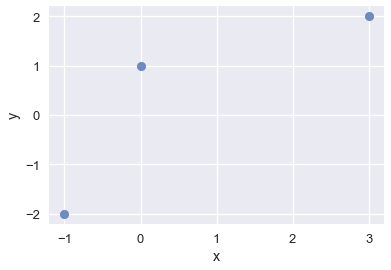

In [5]:
# HIDDEN
sns.regplot(x='x', y='y', data=data, ci=None, fit_reg=False);

By inspecting our scatter plot, we see that no line can perfectly fit our points, so we cannot achieve 0 loss. Thus, we know that $\textbf{y}$ is not in the plane spanned by $\textbf{x}$ and $\textbf{1}$, represented as a parallelogram below.

```{image} linear_projection_img/proj1.png
:alt: proj1.png
:width: 500px
:align: center
```

Since our loss is distance-based, we can see that to minimize $ L(\boldsymbol\theta, \textbf{x}, \textbf{y}) = \left \Vert  \textbf{y} - \textbf{X} \boldsymbol\theta \right \Vert ^2$, we want $\textbf{X} \boldsymbol\theta$ to be as close to $\textbf{y}$ as possible.

Mathematically, we are looking for the projection of $\textbf{y}$ onto the vector space spanned by the columns of $\textbf{X}$, as the projection of any vector is the closest point in $Span(\textbf{X})$ to that vector. Thus, choosing $\boldsymbol\theta$ such that $\hat{\textbf{y}} = \textbf{X} \boldsymbol\theta= $ proj$_{Span(\textbf{X})} $ $\textbf{y}$ is the best solution.

```{image} linear_projection_img/proj2.png
:alt: proj2.png
:width: 500px
:align: center
```

To see why, consider other points on the vector space, in purple.

```{image} linear_projection_img/proj3.png
:alt: proj3.png
:width: 500px
:align: center
```

By the Pythagorean Theorem, any other point on the plane is farther from $\textbf{y}$ than $\hat{\textbf{y}}$ is. The length of the perpendicular corresponding to $\hat{\textbf{y}}$ represents the least squared error.

## Linear Algebra

Since we've snuck in a lot of linear algebra concepts already, all that's left is solving for the $\hat{\boldsymbol\theta}$ that yields our desired $\hat{\textbf{y}}$.

A couple things to note: 

```{image} linear_projection_img/proj4.png
:alt: proj4.png
:width: 500px
:align: center
```

- $\hat{\textbf{y}} + \textbf{e} = \textbf{y}$
- $\textbf{e}$ is perpendicular to $\textbf{x}$ and $\textbf{1}$
- $\hat{\textbf{y}} = \textbf{X} \hat{\boldsymbol\theta}$ is the vector closest to $\textbf{y}$ in the vector space spanned by $\textbf{x}$ and $\textbf{1}$

Thus, we arrive at the equation:

$$\textbf{X}  \hat{\boldsymbol\theta} + \textbf{e} = \textbf{y}$$

Left-multiplying both sides by $\textbf{X}^T$:

$$\textbf{X}^T \textbf{X}  \hat{\boldsymbol\theta} + \textbf{X}^T \textbf{e} = \textbf{X}^T \textbf{y}$$

Since $\textbf{e}$ is perpendicular to the columns of $\textbf{X}$, $\textbf{X}^T \textbf{e}$ is a column vector of $0$'s. Thus, we arrive at the Normal Equation:

$$\textbf{X}^T \textbf{X}  \hat{\boldsymbol\theta} = \textbf{X}^T \textbf{y}$$

From here, we can easily solve for $\hat{\boldsymbol\theta}$ by left-multiplying both sides by $(\textbf{X}^T \textbf{X})^{-1}$:

$$\hat{\boldsymbol\theta} = (\textbf{X}^T \textbf{X})^{-1} \textbf{X}^T \textbf{y}$$

Note: we can get this same solution by minimizing with vector calculus, but in the case of least squares loss, vector calculus isn't necessary. For other loss functions, we will need to use vector calculus to get the analytic solution.

## Finishing up the Case Study

Let's return to our case study, apply what we've learned, and explain why our solution is sound.

$$
\textbf{y} = \begin{bmatrix} 2 \\ 1 \\ -2  \end{bmatrix} \qquad \textbf{X} = \begin{bmatrix} 1 & 3 \\ 1 & 0 \\ 1 & -1 \end{bmatrix}
$$


$$
\begin{align}
\hat{\boldsymbol\theta} 
&= 
\left(
\begin{bmatrix} 1 & 1 & 1 \\ 3 & 0 & -1 \end{bmatrix}
\begin{bmatrix} 1 & 3 \\ 1 & 0 \\ 1 & -1 \end{bmatrix}
\right)^{-1}
\begin{bmatrix} 1 & 1 & 1 \\ 3 & 0 & -1 \end{bmatrix}
\begin{bmatrix} 2 \\ 1 \\ -2  \end{bmatrix} \\
&= 
\left(
\begin{bmatrix} 3 & 2\\ 2 & 10 \end{bmatrix}
\right)^{-1}
\begin{bmatrix} 1 \\ 8 \end{bmatrix} \\
&=
\frac{1}{30-4}
\begin{bmatrix} 10 & -2\\ -2 & 3 \end{bmatrix}
\begin{bmatrix} 1 \\ 8 \end{bmatrix} \\
&=
\frac{1}{26}
\begin{bmatrix} -6 \\ 22 \end{bmatrix}\\
&=
\begin{bmatrix} - \frac{3}{13} \\ \frac{11}{13} \end{bmatrix}
\end{align}
$$

We have analytically found that best model for least squares regression is $f_\boldsymbol{\boldsymbol\theta}(x_i) = - \frac{3}{13} + \frac{11}{13} x_i$. We know that our choice of $\boldsymbol\theta$ is sound by the mathematical property that the projection of $\textbf{y}$ onto the span of the columns of $\textbf{X}$ yields the closest point in the vector space to $\textbf{y}$. Under linear constraints using the least squares loss, solving for $\hat{\boldsymbol\theta}$ by taking the projection guarantees us the optimal solution.

## When Variables are Linearly Dependent

For every additional variable, we add one column to $\textbf{X}$. The span of the columns of $\textbf{X}$ is the linear combinations of the column vectors, so adding columns only changes the span if it is linearly independent from all existing columns.

When the added column is linearly dependent, it can be expressed as a linear combination of some other columns, and thus will not introduce new any vectors to the subspace.

Recall that the span of $\textbf{X}$ is important because it is the subspace we want to project $\textbf{y}$ onto. If the subspace does not change, then the projection will not change.

For example, when we introduced $\textbf{x}$ to the constant model to get the simple linear model, we introduced a independent variable. $\textbf{x} = \begin{bmatrix} 3 \\ 0 \\ -1 \end{bmatrix}$ cannot be expressed as a scalar of $\begin{bmatrix} 1 \\ 1 \\ 1 \end{bmatrix}$. Thus, we moved from finding the projection of $\textbf{y}$ onto a line:

```{image} linear_projection_img/1dprojection.png
:alt: 1dprojection.png
:width: 250px
:align: center
```

to finding the projection of $\textbf{y}$ onto a plane:

```{image} linear_projection_img/proj1.png
:alt: proj1.png
:width: 400px
:align: center
```

Now, lets introduce another variable, $\textbf{z}$, and explicitly write out the bias column:

| **z** | **1** | **x** | **y** |
| - | - | - | - |
| 4 | 1 | 3 | 2 |
| 1 | 1 | 0 | 1 |
| 0 | 1 | -1 | -2 |

Notice that $\textbf{z} = \textbf{1} + \textbf{x}$. Since $\textbf{z}$ is a linear combination of $\textbf{1}$ and $\textbf{x}$, it lies in the original $Span(\textbf{X})$. Formally, $\textbf{z}$ is linearly dependent to $\{\textbf{1}$, $\textbf{x}\}$ and does not change $Span(\textbf{X})$. Thus, the projection of $\textbf{y}$ onto the subspace spanned by $\textbf{1}$, $\textbf{x}$, and $\textbf{z}$ would be the same as the projection of $\textbf{y}$ onto the subspace spanned by $\textbf{1}$ and $\textbf{x}$.

```{image} linear_projection_img/dependent_variablesz.png
:alt: dependent_variablesz.png
:width: 500px
:align: center
```

We can also observe this from minimizing the loss function:

$$ 
\begin{aligned}
L(\boldsymbol\theta, \textbf{d}, \textbf{y})
&= \left \Vert  \qquad   
\begin{bmatrix} y_1 \\ y_2 \\ y_3  \end{bmatrix} \quad - \quad 
\begin{bmatrix} 1 & x_1 & z_1 \\ 1 & x_2 & z_2\\ 1 & x_3 & z_3\end{bmatrix}
\begin{bmatrix} 
     \theta_0 \\
     \theta_1 \\
     \theta_2
\end{bmatrix}
\qquad \right \Vert ^2
\end{aligned}
$$


Our possible solutions follow the form $\theta_0 \textbf{1} + \theta_1 \textbf{x} + \theta_2 \textbf{z}$.


Since $\textbf{z} = \textbf{1} + \textbf{x}$, regardless of $\theta_0$, $\theta_1$, and $\theta_2$, the possible values can be rewritten as:

$$
\begin{aligned}
\theta_0 \textbf{1} + \theta_1 \textbf{x} + \theta_2 (\textbf{1} + \textbf{x})
&= 
(\theta_0 + \theta_2) \textbf{1} + (\theta_1 + \theta_2) \textbf{x} \\
\end{aligned}
$$

So adding $\textbf{z}$ does not change the problem at all. The only difference is, we can express this projection in multiple ways. Recall that we found the projection of $\textbf{y}$ onto the plane spanned by $\textbf{1}$ and $\textbf{x}$ to be:

$$ \begin{bmatrix} \textbf{1} & \textbf{x} \end{bmatrix}  \begin{bmatrix} - \frac{3}{13} \\ \frac{11}{13} \end{bmatrix} = - \frac{3}{13} \textbf{1} + \frac{11}{13} \textbf{x}$$

However, with the introduction of $\textbf{z}$, we have more ways to express this same projection vector. 

Since $\textbf{1} = \textbf{z} - \textbf{x}$, $\hat{\textbf{y}}$ can also be expressed as:

$$ - \frac{3}{13} (\textbf{z} - \textbf{x}) + \frac{11}{13} \textbf{x} = - \frac{3}{13} \textbf{z} + \frac{14}{13} \textbf{x} $$

Since $\textbf{x} = \textbf{z} + \textbf{1}$, $\hat{\textbf{y}}$ can also be expressed as:

$$ - \frac{3}{13} \textbf{1} + \frac{11}{13} (\textbf{z} + \textbf{1}) = \frac{8}{13} \textbf{1} + \frac{11}{13} \textbf{z} $$

But all three expressions represent the same projection.

In conclusion, adding a linearly dependent column to $\textbf{X}$ does not change $Span(\textbf{X})$, and thus will not change the projection and solution to the least squares problem.

## Two Schools of Thought

We included the scatter plots twice in this lesson. The first reminded us that like before, we are finding the best-fit line for the data. The second showed that there was no line that could fit all points. Apart from these two occurences, we tried not to disrupt our vector space drawings with scatter plots. This is because scatter plots correspond with the row-space perspective of the least squares problem: looking at each data point and trying to minimize the distance between our predictions and each datum. In this lesson, we looked at the column-space perspective: each feature was a vector, constructing a space of possible solutions (projections).